# Tutorial 1: DFN Generation

A Discrete Fracture Network is a simplified discrete representation of fractured media. In $D$-dimensions, fractures are represented as objects of dimension $D-1$.

Natural fracture networks are found to follow power-law size distributions (ref):

<center>
$n(l)=\alpha.l^{-a}$
</center>

So that the total number of fractures $N$ in the system of size $L$ and dimension $D$ can be written as:

<center>
$N=  \int_{l_{min}}^{l_{max}} n(l).L^{D} \, \mathrm{d}l $
</center>


## Imports

In [1]:
%matplotlib inline
import sys
import time
import k3d
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as pyplot 
import matplotlib.colors
import numpy as np
import pylab as pylab
import ipywidgets as widgets
mypath = os.getcwd()

import dfnlab.DFNBasis as dfnBasis
import dfnlab.DFNGenerator as dfnGen
import dfnlab.DFNAnalysis as dfnAnalysis
import dfnlab.DFNIO as dfnIO

## Plot function

In [2]:
def plot_dfn(dfn,namedir,name):
    """ plot a DFN within a jupyter notebook 
        as attr
    """
    import dfnlab.DFNIO as dfnIO
    import vtk
    fout = os.path.join(namedir,'dfnvtkdata_{}.vtp'.format(name))
    dfnIO.write_DFN_file(dfn,fout)
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(fout)
    reader.Update()
    model_matrix = (
         1.0,  0.0, 0.0, 0.0,
         0.0,  0.0, 1.0, 0.0,
         0.0,  1.0, 0.0, 0.0,
         0.0,  0.0, 0.0, 1.0
    )
    plot = k3d.plot()
    size = dfn.getSystem().getSize()
    dfn3d = k3d.vtk_poly_data(reader.GetOutput(), color_attribute = ('FractureSize',0,size), color_map=k3d.basic_color_maps.Jet, model_matrix=model_matrix)
    plot += dfn3d
    plot.display()

## Parameters 

In [3]:
a = 3
L = 100
lmin = 1
lmax = 100
p32 = 0.5

In [4]:
system = dfnBasis.System()
system.buildParallelepiped([0, 0, 0],L)
fnet = dfnBasis.DFN(system)
generator = dfnGen.PoissonGenerator(fnet, 1001)
generator.setSizesPowerlaw(a,lmin,lmax)
generator.setPositionsUniform()
generator.setOrientationsUniform()
generator.setStopDensity(p32)
generator.generate()
plot_dfn(fnet,mypath,'my_dfn')

Output()

__Plot the size distribution__

N = 78712
lmin = 1.0000116074775502
lmax = 97.01934311622004
alpha = 0.19296143006687716
a = 3.1810883367448515


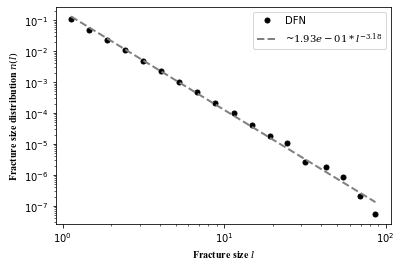

In [5]:
def plot_size_distribution(size_distribution, figureName):
    csfont = {'fontname':'Times New Roman'}
    pyplot.rcParams['mathtext.fontset'] = 'dejavuserif'
    fig = pyplot.figure()
    ax = pyplot.axes()
    ax.set_xscale("log")
    ax.set_yscale("log")
    l = np.array(size_distribution['Val'])
    idx1 = [True if l[i]!=0 else False for i in range(0,len(l)) ]
    nl = np.array(size_distribution['Pdf'])
    idx2 = [True if nl[i]!=0 else False for i in range(0,len(nl)) ]
    idx = idx1 and idx2
    l = l[idx]
    nl = nl[idx]
    ax.plot(l,nl,marker='o',markersize=5, linewidth=0, color='k',label='DFN')

    log_l = np.log10(l)
    log_nl = np.log10(nl)
    idx = np.isfinite(log_l) & np.isfinite(log_nl)
    m, b = pylab.polyfit(log_l[idx],log_nl[idx],1)
    a=-m
    alpha = 10**b 
    print("alpha = {}".format(alpha))
    print("a = {}".format(a))
    fit = [alpha*pow(elt,-a) for elt in l]
    lab = '~$'+"{:.2e}".format(alpha)+'*l^{-'+str(round(a,2))+'}$'
    ax.plot(l,fit,marker='o', linestyle='dashed', markersize=0, linewidth=2, color='grey', label=lab)

    pyplot.xlabel('Fracture size $l$',**csfont)
    pyplot.ylabel('Fracture size distribution $n(l)$',**csfont)
    pyplot.legend()
    return fig
    
    
analyser = dfnAnalysis.DFNAnalyser(fnet)
nl = analyser.sizeDistribution(20); # number of bins
print("N = {}".format(fnet.nbFractures()))
print("lmin = {}".format(fnet.minFractureSize()))
print("lmax = {}".format(fnet.maxFractureSize()))
fig = plot_size_distribution(nl, r'size_distribution.png')